# Student Information

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 10px; background-color: #f9f9f9;">
    <h2 style="color: #4CAF50;">👨‍💻 Abdelah Nesredin</h2>
    <p style="font-size: 16px; color: #333;">
        <strong>ID Number:</strong> <span style="color: #4CAF50;">1400751</span><br>
        <strong>Department:</strong> <span style="color: #4CAF50;">Software Engineering</span><br>
        <strong>Course:</strong> <span style="color: #4CAF50;">Machine Learning</span><br>
        <strong>Project Title:</strong> <span style="color: #4CAF50;">Football Match Outcome Prediction</span><br>
                <strong>Dataset:</strong> <span style="color: #4CAF50;"> Engilish Priemer Leuge Data Set from 1993 2025</span><br/>
          <strong>DatasetSource:</strong> <span style="color: #4CAF50;"> Engilish Priemer Leuge Data Set from 1993 2025 csv github link <a href="https://github.com/IvanRamosDataTech/Premier-League/blob/master/dataset/PremierLeague.csv">clcik here to see the source  link </a></span>
    </p>
</div>

### Step 1: Load and Inspect the Dataset

In this step, I load the Premier League dataset using `pandas`. The dataset is loaded from a CSV file located at `'PremierLeague.csv'`. We also drop any rows with missing values using `dropna()`. 

After loading the dataset, we display the first few rows to inspect the data and check the structure of the dataset using `info()`.


In [6]:
import pandas as pd

# Load the dataset
file_path = 'PremierLeague.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
df = df.dropna()

# Display the first few rows to inspect the data
print(df.head())

# Check the columns and data types
print(df.info())
### Step 1: Load and Inspect the Dataset




                                     MatchID     Season  MatchWeek  \
9880             2019-2020_Liverpool_Norwich  2019-2020          1   
9881             2019-2020_West Ham_Man City  2019-2020          1   
9882  2019-2020_Bournemouth_Sheffield United  2019-2020          1   
9883           2019-2020_Burnley_Southampton  2019-2020          1   
9884        2019-2020_Crystal Palace_Everton  2019-2020          1   

            Date   Time        HomeTeam          AwayTeam  \
9880  2019-08-09  20:00       Liverpool           Norwich   
9881  2019-08-10  12:30        West Ham          Man City   
9882  2019-08-10  15:00     Bournemouth  Sheffield United   
9883  2019-08-10  15:00         Burnley       Southampton   
9884  2019-08-10  15:00  Crystal Palace           Everton   

      FullTimeHomeTeamGoals  FullTimeAwayTeamGoals FullTimeResult  ...  \
9880                      4                      1              H  ...   
9881                      0                      5              

### Data Understanding and Exploration

In this step, I begin by loading the dataset into a pandas DataFrame for further analysis. We use the `read_csv()` function to read the data from the CSV file located at `'PremierLeague.csv'`. After loading the data, we display the first few rows of the dataset using `head()` to get an initial look at the structure and contents of the data.

Additionally, we use `info()` to examine the data types of each column, the number of non-null values, and overall data quality.

This is the first part of the exploratory data analysis (EDA), which helps in understanding the structure and characteristics of the data.


In [19]:
import pandas as pd

# Load the dataset
file_path = 'PremierLeague.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows to inspect the data
print(df.head())

# Check the columns and data types
print(df.info())


                              MatchID     Season  MatchWeek        Date Time  \
0          1993-1994_Arsenal_Coventry  1993-1994          1  1993-08-14  NaN   
1           1993-1994_Aston Villa_QPR  1993-1994          1  1993-08-14  NaN   
2         1993-1994_Chelsea_Blackburn  1993-1994          1  1993-08-14  NaN   
3  1993-1994_Liverpool_Sheffield Weds  1993-1994          1  1993-08-14  NaN   
4            1993-1994_Man City_Leeds  1993-1994          1  1993-08-14  NaN   

      HomeTeam        AwayTeam  FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  \
0      Arsenal        Coventry                      0                      3   
1  Aston Villa             QPR                      4                      1   
2      Chelsea       Blackburn                      1                      2   
3    Liverpool  Sheffield Weds                      2                      0   
4     Man City           Leeds                      1                      1   

  FullTimeResult  ...  MarketMaxAwayTe

### Data Understanding: Summary Statistics

In this section, I compute summary statistics to better understand the dataset's numerical and categorical features.

- **Numerical Summary**: We use the `describe()` function to generate summary statistics for all numerical columns in the dataset. This includes information like the count, mean, standard deviation, min, max, and quartiles.

- **Categorical Summary**: For the categorical columns, we use `describe(include=['object'])` to gather summary statistics specific to non-numeric data. In addition, we calculate:
  - **Missing values** for each categorical column.
  - The **mode** (most frequent value) for each categorical feature.
  - **Value counts** for each categorical column, which gives the frequency of each unique value.

This analysis helps identify trends in the data, as well as any potential issues, such as missing values or imbalanced categories.


In [23]:


# Summary statistics for numerical columns
print("Numerical Summary:")
print(df.describe())

# Summary for categorical columns with additional insights

print("\nCategorical Summary:")
categorical_summary = df.describe(include=['object']).T
categorical_summary['missing'] = df.isnull().sum()
categorical_summary['mode'] = df.mode().iloc[0]

# Compute value counts separately and store them as a dictionary
value_counts_dict = {col: df[col].value_counts().to_dict() for col in df.select_dtypes(include=['object']).columns}

# Convert value_counts_dict to a Series and align it properly
categorical_summary['value_counts'] = pd.Series(value_counts_dict)

print(categorical_summary)




Numerical Summary:
          MatchWeek  FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  \
count  11978.000000           11978.000000           11978.000000   
mean      18.934797               1.533061               1.161630   
std       11.036498               1.308268               1.148602   
min        1.000000               0.000000               0.000000   
25%        9.000000               1.000000               0.000000   
50%       19.000000               1.000000               1.000000   
75%       28.000000               2.000000               2.000000   
max       41.000000               9.000000               9.000000   

       HalfTimeHomeTeamGoals  HalfTimeAwayTeamGoals  HomeTeamShots  \
count           11218.000000           11218.000000    9318.000000   
mean                0.689606               0.511321      13.617085   
std                 0.838858               0.731679       5.346768   
min                 0.000000               0.000000       0.000000   
25%      

### Data Quality: Missing Values Analysis

In this step, I calculate the percentage of missing values in each column of the dataset. By using `isnull()` followed by `mean()`, we obtain the proportion of missing values for each column, which is then multiplied by 100 to express the result as a percentage.

This helps identify which columns have missing data and can be useful for deciding whether to drop or fill missing values during data preprocessing.


In [25]:
# Check the percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


MatchID                    0.000000
Season                     0.000000
MatchWeek                  0.000000
Date                       0.000000
Time                      82.484555
HomeTeam                   0.000000
AwayTeam                   0.000000
FullTimeHomeTeamGoals      0.000000
FullTimeAwayTeamGoals      0.000000
FullTimeResult             0.000000
HalfTimeHomeTeamGoals      6.344966
HalfTimeAwayTeamGoals      6.344966
HalfTimeResult             6.344966
Referee                   22.207380
HomeTeamShots             22.207380
AwayTeamShots             22.207380
HomeTeamShotsOnTarget     22.207380
AwayTeamShotsOnTarget     22.207380
HomeTeamCorners           22.207380
AwayTeamCorners           22.207380
HomeTeamFouls             22.207380
AwayTeamFouls             22.207380
HomeTeamYellowCards       22.207380
AwayTeamYellowCards       22.207380
HomeTeamRedCards          22.207380
AwayTeamRedCards          22.207380
B365HomeTeam              28.552346
B365Draw                  28

## Data Cleaning: Handling Missing Values

In this section, I clean the dataset by removing columns that contain any missing values.

### Drop Columns with Missing Values



In [16]:
# Drop columns with any missing values
df_cleaned = df.dropna(axis=1, how='any')

# Display the cleaned DataFrame
print(df_cleaned.head())

# Verify that there are no missing values
print(df_cleaned.isnull().mean() * 100)  # This will show the missing percentage for each column


                                     MatchID     Season  MatchWeek  \
9880             2019-2020_Liverpool_Norwich  2019-2020          1   
9881             2019-2020_West Ham_Man City  2019-2020          1   
9882  2019-2020_Bournemouth_Sheffield United  2019-2020          1   
9883           2019-2020_Burnley_Southampton  2019-2020          1   
9884        2019-2020_Crystal Palace_Everton  2019-2020          1   

            Date   Time        HomeTeam          AwayTeam  \
9880  2019-08-09  20:00       Liverpool           Norwich   
9881  2019-08-10  12:30        West Ham          Man City   
9882  2019-08-10  15:00     Bournemouth  Sheffield United   
9883  2019-08-10  15:00         Burnley       Southampton   
9884  2019-08-10  15:00  Crystal Palace           Everton   

      FullTimeHomeTeamGoals  FullTimeAwayTeamGoals FullTimeResult  ...  \
9880                      4                      1              H  ...   
9881                      0                      5              

## Drop Columns with Missing Values and Verify Cleanliness

The following code demonstrates  to drop columns with any missing values from a DataFrame, display the cleaned DataFrame, and verify that there are no missing values in the cleaned data.

### Steps:

1. **Drop Columns with Missing Values**  
   The `dropna()` function is used to remove columns with any missing values (`NaN`). The argument `axis=1` specifies that columns should be dropped, and `how='any'` ensures that only columns containing at least one missing value are removed.

2. **Display the Cleaned DataFrame**  
   The `head()` function is used to display the first few rows of the cleaned DataFrame, allowing you to quickly inspect the result.

3. **Verify Missing Values**  
   The `isnull().mean() * 100` expression calculates the percentage of missing values for each column in the cleaned DataFrame. This ensures that no columns in the cleaned DataFrame have missing values.

### Code Example:




In [35]:
# Drop columns with any missing values
df_cleaned = df.dropna(axis=1, how='any')

# Display the cleaned DataFrame
print(df_cleaned.head())

# Verify that there are no missing values
print(df_cleaned.isnull().mean() * 100)  # This will show the missing percentage for each column



                              MatchID     Season  MatchWeek        Date  \
0          1993-1994_Arsenal_Coventry  1993-1994          1  1993-08-14   
1           1993-1994_Aston Villa_QPR  1993-1994          1  1993-08-14   
2         1993-1994_Chelsea_Blackburn  1993-1994          1  1993-08-14   
3  1993-1994_Liverpool_Sheffield Weds  1993-1994          1  1993-08-14   
4            1993-1994_Man City_Leeds  1993-1994          1  1993-08-14   

      HomeTeam        AwayTeam  FullTimeHomeTeamGoals  FullTimeAwayTeamGoals  \
0      Arsenal        Coventry                      0                      3   
1  Aston Villa             QPR                      4                      1   
2      Chelsea       Blackburn                      1                      2   
3    Liverpool  Sheffield Weds                      2                      0   
4     Man City           Leeds                      1                      1   

  FullTimeResult  HomeTeamPoints  AwayTeamPoints  
0              A 

## Check for Missing Values and Save Cleaned DataFrame

The following code checks if there are any missing values in the cleaned DataFrame and saves it to a CSV file if no missing values are found.

### Steps:

1. **Check for Missing Values**  
   The `missing_percentage.sum()` is used to check the total percentage of missing values across all columns. If the sum is zero, it indicates that there are no missing values in the cleaned DataFrame.

2. **Save the Cleaned DataFrame**  
   If no missing values are found, the `to_csv()` function saves the cleaned DataFrame to a CSV file (`cleaned_file.csv`), without including the index (`index=False`).

3. **Print Confirmation**  
   If the DataFrame has no missing values, a confirmation message is printed, and the file is saved. Otherwise, a message indicating the presence of missing values is displayed.

### Code IMPLEMENTATION 👇🏿⬇️:




In [39]:
# If no missing values are found, save the cleaned DataFrame back to CSV
if missing_percentage.sum() == 0:
    df_cleaned.to_csv('cleaned_file.csv', index=False)
    print("No missing values. Cleaned file saved.")
else:
    print("Missing values remain in the dataset.")


No missing values. Cleaned file saved.


## Data Visualization with Seaborn and Matplotlib

i Want in The following code demonstrates various visualizations of a cleaned dataset, focusing on match data, team goals, and match outcomes. Each plot helps in understanding the relationships between different variables in the dataset.

### 1. **Boxplot: FullTimeHomeTeamGoals by FullTimeResult**
   - Displays the distribution of home team goals for each match result.
   
### 2. **Boxplot: FullTimeAwayTeamGoals by FullTimeResult**
   - Displays the distribution of away team goals for each match result.

### 3. **Violin Plot: FullTimeHomeTeamGoals by FullTimeResult**
   - Provides a more detailed view of the distribution of home team goals, including density estimates.

### 4. **Violin Plot: FullTimeAwayTeamGoals by FullTimeResult**
   - Shows the distribution of away team goals, with a density estimate.

### 5. **Histogram: FullTimeHomeTeamGoals**
   - Displays the frequency distribution of home team goals across all matches.

### 6. **Histogram: FullTimeAwayTeamGoals**
   - Displays the frequency distribution of away team goals.

### 7. **Bar Plot: FullTimeResult by HomeTeam**
   - Shows the match outcomes for different home teams, highlighting how many wins, draws, and losses each home team has experienced.

### 8. **Bar Plot: FullTimeResult by AwayTeam**
   - Displays the match outcomes for different away teams, similar to the home team analysis.

### 9. **Count Plot: Distribution of FullTimeResult (match outcome)**
   - Displays the overall distribution of match outcomes (win, draw, loss).

### 10. **Scatter Plot: FullTimeHomeTeamGoals vs HomeTeamPoints**
   - Shows the relationship between home team goals scored and the points they earned.

### 11. **Scatter Plot: FullTimeAwayTeamGoals vs AwayTeamPoints**
   - Displays the relationship between away team goals scored and the points they earned.

### 12. **Correlation Heatmap: Correlation matrix of selected numerical columns**
   - Displays the correlation matrix for selected numerical columns like home and away team goals and points, helping identify any strong relationships.

### 13. **Line Plot: Goals Over Time (Home Team vs Away Team)**
   - Shows how home and away team goals have evolved over time, providing insight into trends in the dataset.

### Code Implementation ⬇️👇🏿:



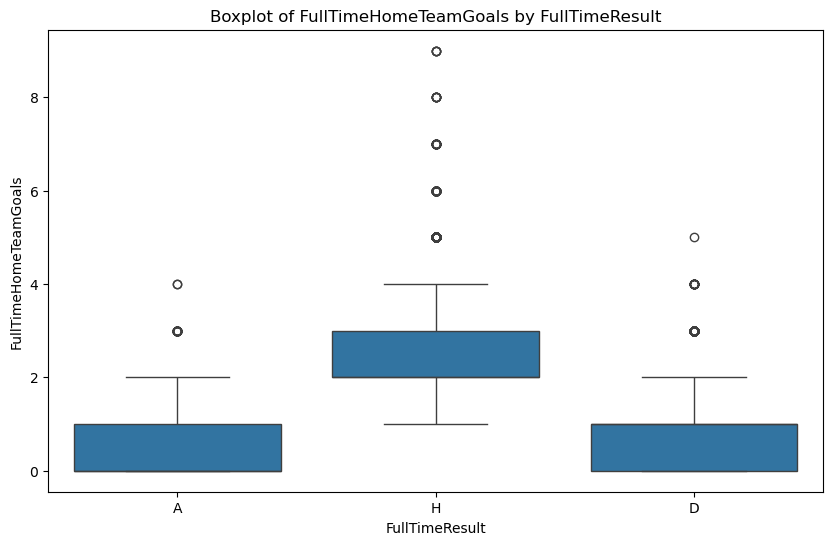

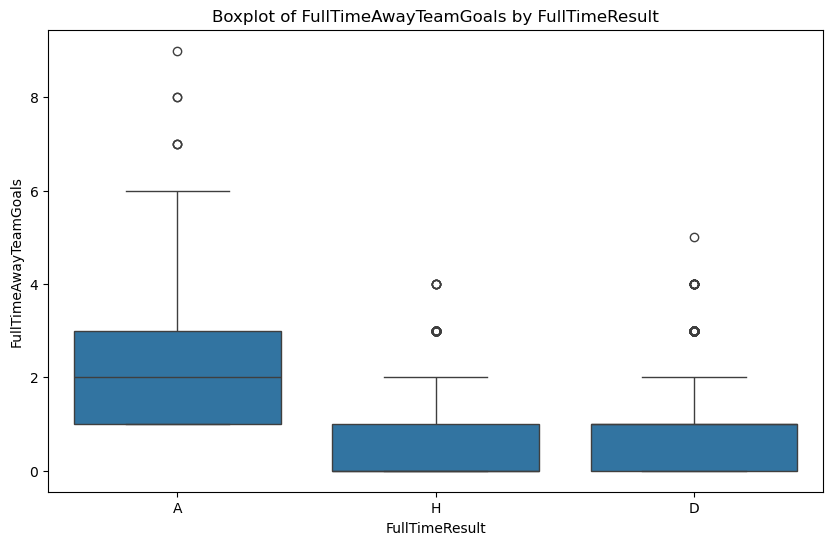

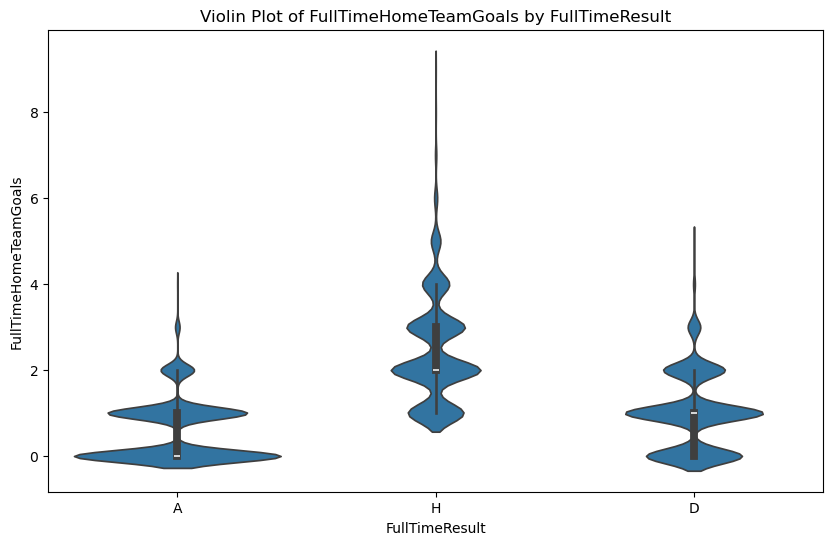

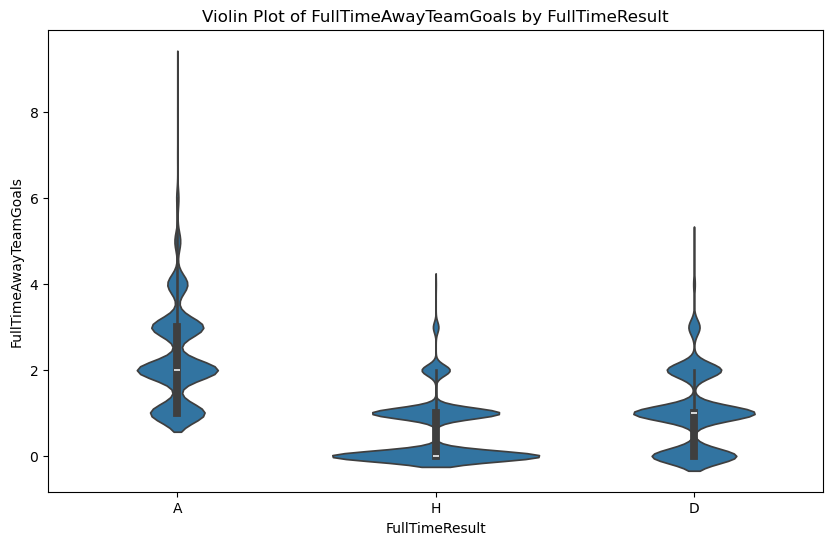

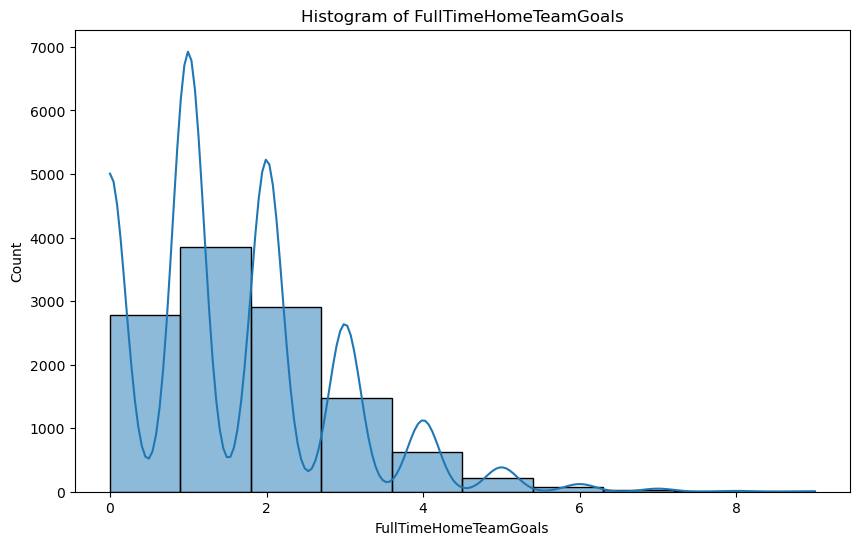

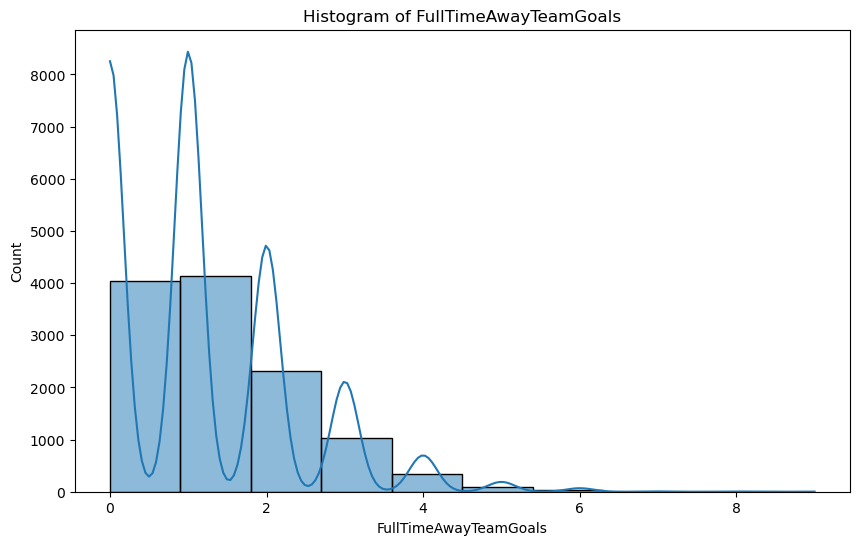

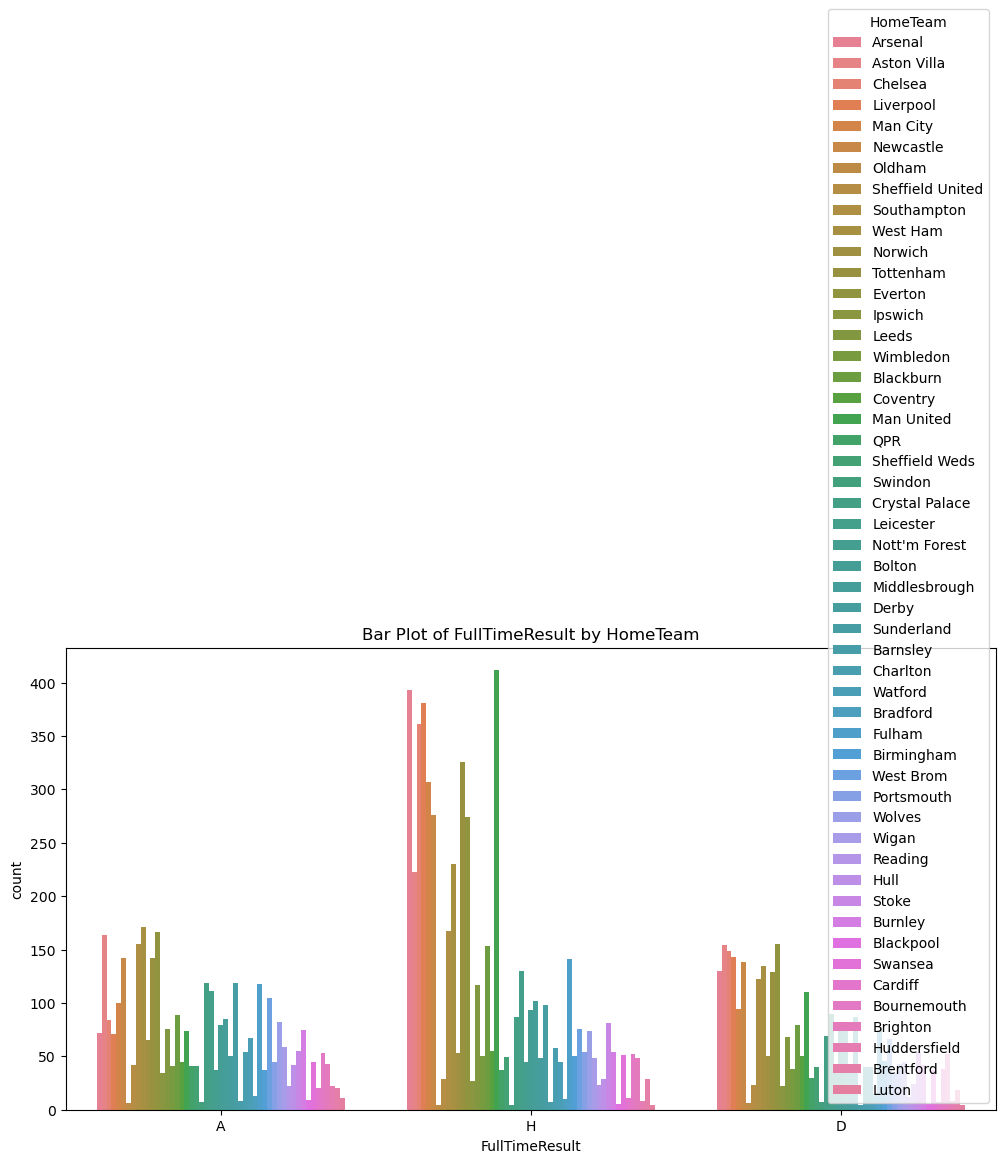

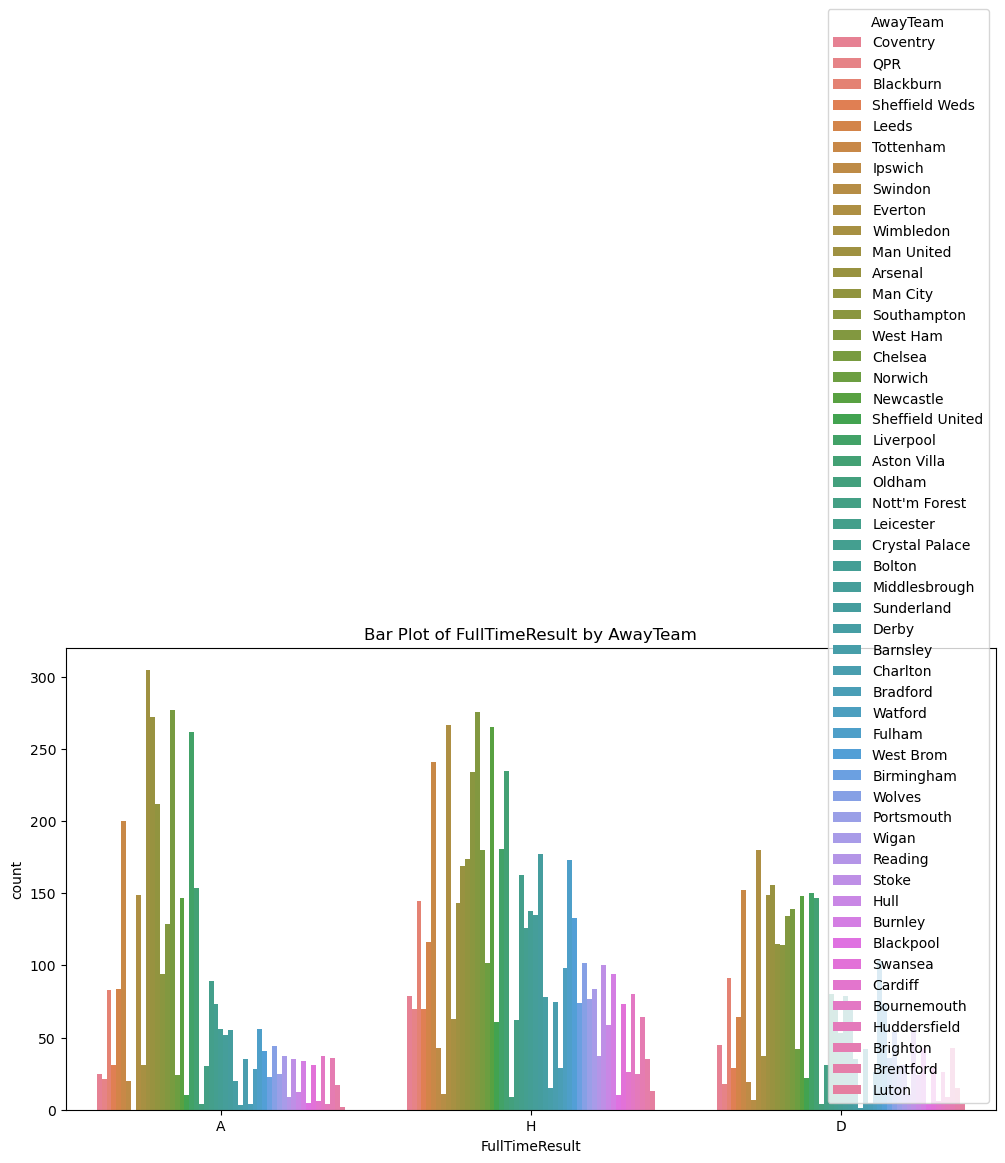

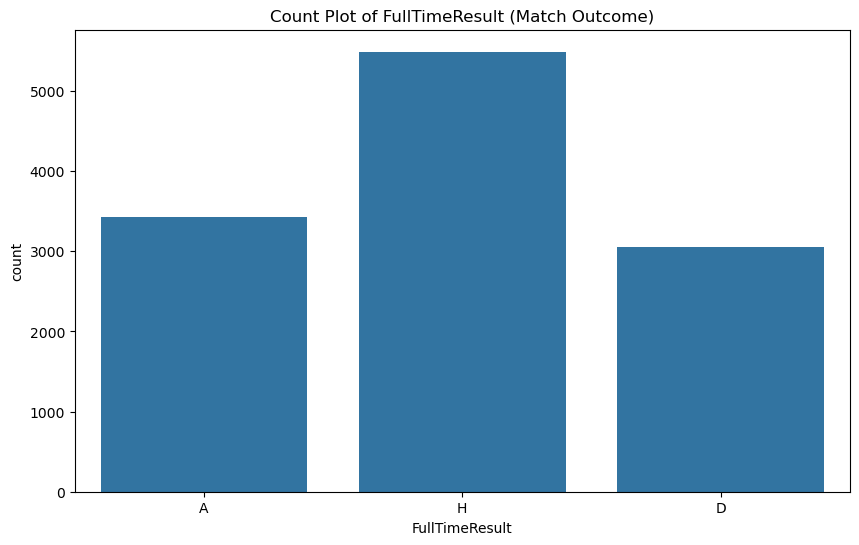

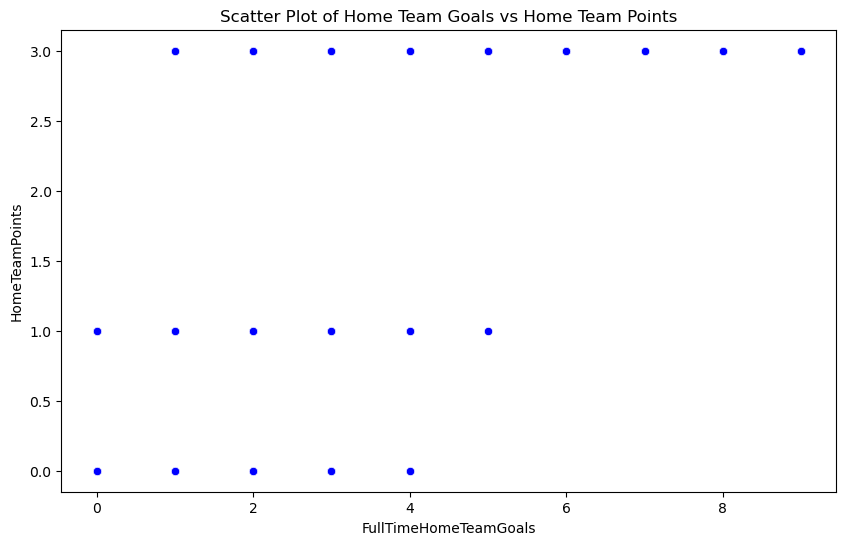

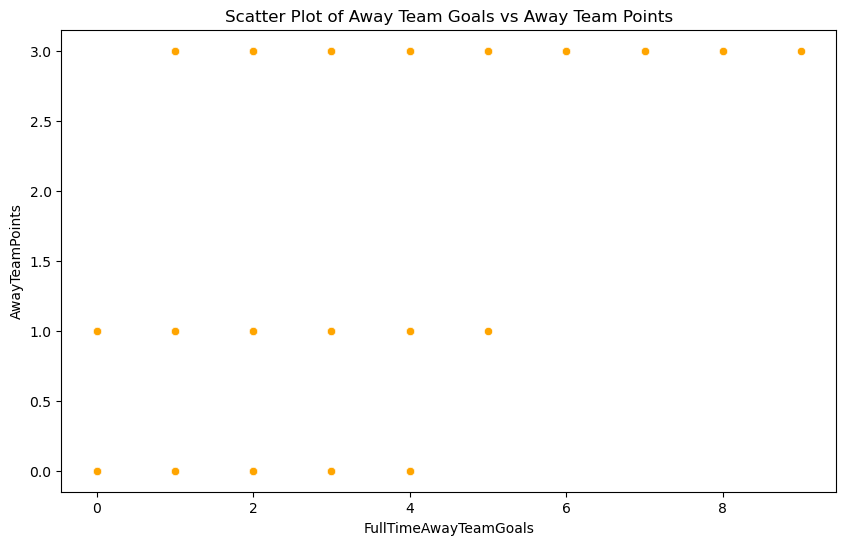

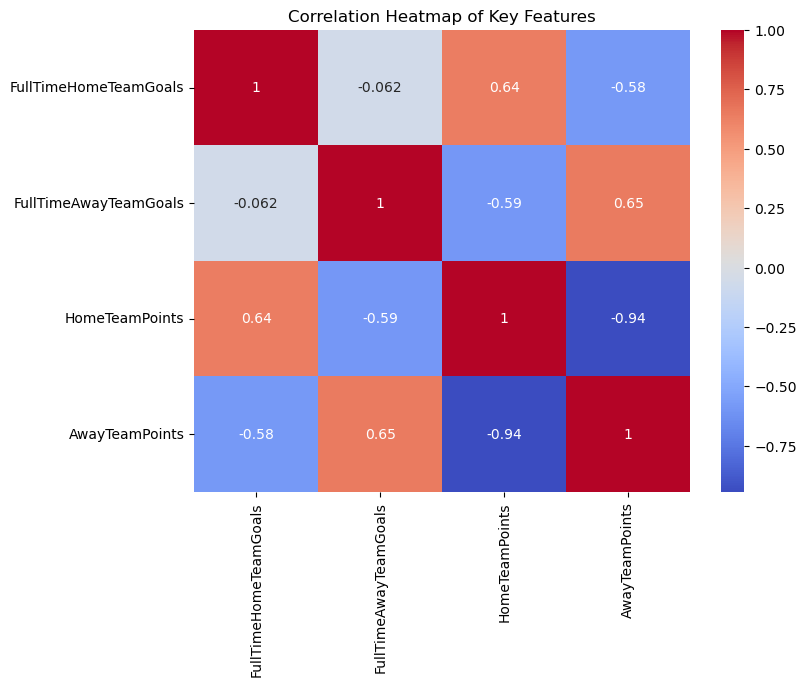

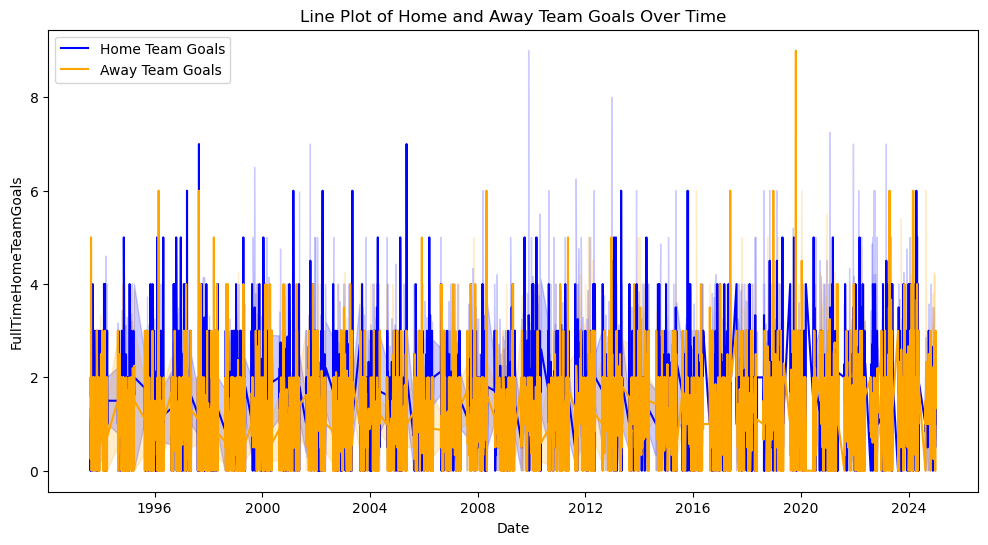

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the cleaned CSV file into a DataFrame
df_cleaned_data = pd.read_csv('cleaned_file.csv')

# 1. Boxplot: FullTimeHomeTeamGoals by FullTimeResult
plt.figure(figsize=(10, 6))
sns.boxplot(x='FullTimeResult', y='FullTimeHomeTeamGoals', data=df_cleaned_data)
plt.title('Boxplot of FullTimeHomeTeamGoals by FullTimeResult')
plt.show()

# 2. Boxplot: FullTimeAwayTeamGoals by FullTimeResult
plt.figure(figsize=(10, 6))
sns.boxplot(x='FullTimeResult', y='FullTimeAwayTeamGoals', data=df_cleaned_data)
plt.title('Boxplot of FullTimeAwayTeamGoals by FullTimeResult')
plt.show()

# 3. Violin Plot: FullTimeHomeTeamGoals by FullTimeResult
plt.figure(figsize=(10, 6))
sns.violinplot(x='FullTimeResult', y='FullTimeHomeTeamGoals', data=df_cleaned_data)
plt.title('Violin Plot of FullTimeHomeTeamGoals by FullTimeResult')
plt.show()

# 4. Violin Plot: FullTimeAwayTeamGoals by FullTimeResult
plt.figure(figsize=(10, 6))
sns.violinplot(x='FullTimeResult', y='FullTimeAwayTeamGoals', data=df_cleaned_data)
plt.title('Violin Plot of FullTimeAwayTeamGoals by FullTimeResult')
plt.show()

# 5. Histogram: FullTimeHomeTeamGoals
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_data['FullTimeHomeTeamGoals'], bins=10, kde=True)
plt.title('Histogram of FullTimeHomeTeamGoals')
plt.show()

# 6. Histogram: FullTimeAwayTeamGoals
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_data['FullTimeAwayTeamGoals'], bins=10, kde=True)
plt.title('Histogram of FullTimeAwayTeamGoals')
plt.show()

# 7. Bar Plot: FullTimeResult by HomeTeam
plt.figure(figsize=(12, 6))
sns.countplot(x='FullTimeResult', hue='HomeTeam', data=df_cleaned_data)
plt.title('Bar Plot of FullTimeResult by HomeTeam')
plt.show()

# 8. Bar Plot: FullTimeResult by AwayTeam
plt.figure(figsize=(12, 6))
sns.countplot(x='FullTimeResult', hue='AwayTeam', data=df_cleaned_data)
plt.title('Bar Plot of FullTimeResult by AwayTeam')
plt.show()

# 9. Count Plot: Distribution of FullTimeResult (match outcome)
plt.figure(figsize=(10, 6))
sns.countplot(x='FullTimeResult', data=df_cleaned_data)
plt.title('Count Plot of FullTimeResult (Match Outcome)')
plt.show()

# 10. Scatter Plot: FullTimeHomeTeamGoals vs HomeTeamPoints
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FullTimeHomeTeamGoals', y='HomeTeamPoints', data=df_cleaned_data, color='blue')
plt.title('Scatter Plot of Home Team Goals vs Home Team Points')
plt.show()

# 11. Scatter Plot: FullTimeAwayTeamGoals vs AwayTeamPoints
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FullTimeAwayTeamGoals', y='AwayTeamPoints', data=df_cleaned_data, color='orange')
plt.title('Scatter Plot of Away Team Goals vs Away Team Points')
plt.show()

# 12. Correlation Heatmap: Correlation matrix of selected numerical columns
correlation_matrix = df_cleaned_data[['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'HomeTeamPoints', 'AwayTeamPoints']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Features')
plt.show()

# 13. Line Plot: Goals Over Time (Home Team vs Away Team)
df_cleaned_data['Date'] = pd.to_datetime(df_cleaned_data['Date'])  # Convert Date to datetime format
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='FullTimeHomeTeamGoals', data=df_cleaned_data, label='Home Team Goals', color='blue')
sns.lineplot(x='Date', y='FullTimeAwayTeamGoals', data=df_cleaned_data, label='Away Team Goals', color='orange')
plt.title('Line Plot of Home and Away Team Goals Over Time')
plt.legend()
plt.show()




## Data Preprocessing for Model Training

This code demonstrates a series of data preprocessing steps to clean and prepare the dataset for machine learning model training. The steps include handling missing values, removing duplicates, encoding categorical features, scaling numerical features, and engineering new features.

### 1. **Handling Missing Values**
   - **Numerical Columns**: Missing values in numerical columns are imputed using the **median** value.
   - **Categorical Columns**: Missing values in categorical columns are imputed using the **most frequent** category.

### 2. **Handling Inconsistencies**
   - **Duplicate Rows**: Any duplicate rows are removed from the dataset.
   - **Check for Unique Values**: The unique values in categorical columns (`HomeTeam` and `AwayTeam`) are printed to check for any inconsistencies.

### 3. **Handling Outliers**
   - **Interquartile Range (IQR)**: Outliers are detected using IQR. Any rows containing outliers in the numerical columns are removed.

### 4. **Encoding Categorical Features**
   - **Label Encoding**: The categorical columns (`HomeTeam`, `AwayTeam`, and `FullTimeResult`) are encoded using **Label Encoding** to convert the categorical values into numeric labels.

### 5. **Scaling Numerical Features**
   - **Min-Max Scaling**: Numerical features (`FullTimeHomeTeamGoals`, `FullTimeAwayTeamGoals`, `HomeTeamPoints`, `AwayTeamPoints`) are scaled to a range of [0, 1] using **Min-Max Scaling**.

### 6. **Feature Engineering**
   - **Goal Difference**: A new feature, `GoalDifference`, is created by subtracting away team goals from home team goals.

### 7. **Date Handling**
   - **Extract Year, Month, and Day of the Week**: From the `Date` column, new features for the year, month, and day of the week are extracted to capture temporal patterns in the data.

### Code Impelmentation 👇🏿⬇️:


In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Check for missing values
print("Missing values in each column:")
print(df_cleaned_data.isnull().sum())

# 1. Handle Missing Values
# Impute missing values for numerical columns using the median
numerical_cols = df_cleaned_data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df_cleaned_data[numerical_cols] = imputer.fit_transform(df_cleaned_data[numerical_cols])

# If there are any missing categorical values, fill them with the most frequent category
categorical_cols = df_cleaned_data.select_dtypes(include=[object]).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_cleaned_data[categorical_cols] = imputer_cat.fit_transform(df_cleaned_data[categorical_cols])

# Check if any missing values remain
print("\nMissing values after imputation:")
print(df_cleaned_data.isnull().sum())

# 2. Handle Inconsistencies
# Remove duplicate rows (if any)
df_cleaned_data = df_cleaned_data.drop_duplicates()

# Check for inconsistencies in categorical features (e.g., HomeTeam, AwayTeam)
print("\nCheck for unique values in 'HomeTeam' and 'AwayTeam':")
print(df_cleaned_data['HomeTeam'].unique())
print(df_cleaned_data['AwayTeam'].unique())

# 3. Handle Outliers
# We can identify outliers using IQR (Interquartile Range) for numerical columns
Q1 = df_cleaned_data[numerical_cols].quantile(0.25)
Q3 = df_cleaned_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_cleaned_data[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned_data[numerical_cols] > (Q3 + 1.5 * IQR)))

# Remove rows with outliers
df_cleaned_data = df_cleaned_data[~outliers.any(axis=1)]

# 4. Encode Categorical Features
# Label encoding for categorical features
label_encoder = LabelEncoder()

# Encode 'HomeTeam', 'AwayTeam', and 'FullTimeResult' columns
df_cleaned_data['HomeTeam'] = label_encoder.fit_transform(df_cleaned_data['HomeTeam'])
df_cleaned_data['AwayTeam'] = label_encoder.fit_transform(df_cleaned_data['AwayTeam'])
df_cleaned_data['FullTimeResult'] = label_encoder.fit_transform(df_cleaned_data['FullTimeResult'])

# 5. Scale or Normalize Numerical Features
# We will use Min-Max scaling to scale the numerical columns to the range [0, 1]
scaler = MinMaxScaler()

# List of numerical columns to scale
numerical_cols_to_scale = ['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'HomeTeamPoints', 'AwayTeamPoints']

# Apply Min-Max scaling
df_cleaned_data[numerical_cols_to_scale] = scaler.fit_transform(df_cleaned_data[numerical_cols_to_scale])

# 6. Feature Engineering
# Add a new column for 'GoalDifference'
df_cleaned_data['GoalDifference'] = df_cleaned_data['FullTimeHomeTeamGoals'] - df_cleaned_data['FullTimeAwayTeamGoals']

# 7. Date Handling: Extract Year, Month, and Day of the Week from the Date column
df_cleaned_data['Year'] = pd.to_datetime(df_cleaned_data['Date']).dt.year
df_cleaned_data['Month'] = pd.to_datetime(df_cleaned_data['Date']).dt.month
df_cleaned_data['DayOfWeek'] = pd.to_datetime(df_cleaned_data['Date']).dt.dayofweek

# Verify the preprocessed data
print("\nPreprocessed Data Sample This Data is Ready for Model Trainning :")
print(df_cleaned_data.head())


Missing values in each column:
MatchID                  0
Season                   0
MatchWeek                0
Date                     0
HomeTeam                 0
AwayTeam                 0
FullTimeHomeTeamGoals    0
FullTimeAwayTeamGoals    0
FullTimeResult           0
HomeTeamPoints           0
AwayTeamPoints           0
dtype: int64

Missing values after imputation:
MatchID                  0
Season                   0
MatchWeek                0
Date                     0
HomeTeam                 0
AwayTeam                 0
FullTimeHomeTeamGoals    0
FullTimeAwayTeamGoals    0
FullTimeResult           0
HomeTeamPoints           0
AwayTeamPoints           0
dtype: int64

Check for unique values in 'HomeTeam' and 'AwayTeam':
['Arsenal' 'Aston Villa' 'Chelsea' 'Liverpool' 'Man City' 'Newcastle'
 'Oldham' 'Sheffield United' 'Southampton' 'West Ham' 'Norwich'
 'Tottenham' 'Everton' 'Ipswich' 'Leeds' 'Wimbledon' 'Blackburn'
 'Coventry' 'Man United' 'QPR' 'Sheffield Weds' 'Swindon' 'Cr

## Splitting the Data into Training and Test Sets

This step involves splitting the dataset into training and testing sets, with 80% of the data allocated for training the model and 20% for testing the model’s performance. 

### Process:
1. **Define Features and Target Variable**:
   - The features (`X`) consist of numerical columns: `FullTimeHomeTeamGoals`, `FullTimeAwayTeamGoals`, `HomeTeamPoints`, and `AwayTeamPoints`.
   - The target variable (`y`) is the `FullTimeResult` column, representing the match outcome (Home win, Draw, Away win).

2. **Splitting the Data**:
   - The `train_test_split` function from `sklearn.model_selection` is used to randomly split the dataset.
   - 80% of the data is assigned to the training set, and 20% is assigned to the testing set.
   - `random_state=42` ensures that the split is reproducible, meaning the same split is generated every time the code is run.

3. **Output the Sizes**:
   - The shapes of the resulting `X_train`, `X_test`, `y_train`, and `y_test` are printed to confirm the sizes of the datasets.

### Code Implemtation ⬇️👇🏿:

In [88]:
# Step: Split the data into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df_cleaned_data[['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'HomeTeamPoints', 'AwayTeamPoints']]
y = df_cleaned_data['FullTimeResult']  # Target variable (match result: 'H', 'D', 'A')

# Split the data into training and testing sets
print("Splitting data into training and testing sets (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the split data
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("Data split successfully.\n")



Splitting data into training and testing sets (80% train, 20% test)...
Training set size: 8794 samples
Testing set size: 2199 samples
Data split successfully.



## Training the Random Forest Classifier

This step involves initializing and training a **Random Forest Classifier** to predict the match outcome based on the features. After training the model, we evaluate its performance using both the training and test datasets. 

### Process:
1. **Initialize the Random Forest Classifier**:
   - A **RandomForestClassifier** model is initialized with a fixed random seed (`random_state=42`) to ensure reproducibility of results.

2. **Train the Model**:
   - The model is trained using the training data (`X_train` and `y_train`), where the model learns the patterns in the data to predict the target variable (`FullTimeResult`).

3. **Model Evaluation**:
   - **Training Accuracy**: The model’s accuracy is evaluated on the training data using the `score()` function, which calculates the percentage of correct predictions.
   - **Test Accuracy**: The model’s performance is then tested on the unseen test data (`X_test` and `y_test`) to see how well it generalizes to new data.

4. **Feature Importance**:
   - After training the model, the importance of each feature (input variable) is outputted. This shows which features were most influential in making predictions.
  

#  Overfitting in Football Match Prediction Model  

## **🔍 What is Overfitting?**  
Overfitting occurs when a model learns patterns that are too specific to the training data, making it perform exceptionally well on training data but poorly on unseen test data.  

## **📊 Observed Overfitting in Our Model**  
- **Training Accuracy: 1.0000 (100%)**  
- This indicates that the model has learned the training data perfectly, which is a **strong sign of overfitting**.  
- If the test accuracy is significantly lower, it confirms that the model generalizes poorly.  

## **🚨 Why is Overfitting Happening?**  
1. **Too Many Trees in Random Forest**:  
   - With a high number of trees, the model memorizes the training set rather than learning generalizable patterns.  

2. **Small Training Dataset**:  
   - If the dataset is small, the model easily captures every detail, leading to overfitting.  

3. **Lack of Regularization**:  
   - No constraints are placed on the decision trees, allowing them to grow too complex.  

## **🛠️ How to Fix Overfitting?**  
✔ **Reduce the Number of Trees (`n_estimators`)**  



### Code Implementation 👇🏿⬇️:



In [93]:
# Step: Initialize the Random Forest Classifier and Train the Model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
print("Initializing RandomForestClassifier...")
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data (X_train, y_train)
print("Training the model with the training data...")
rf_model.fit(X_train, y_train)

# Output: Check the training progress and model performance
print("Model trained successfully.")

# Checking the model's accuracy on the training data (to understand how well it has learned)
train_accuracy = rf_model.score(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

# Optionally, you can also check the model’s performance on the test data
test_accuracy = rf_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Output the feature importances to see which features the model is relying on
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Top features used by the model):")
print(feature_importance_df)


Initializing RandomForestClassifier...
Training the model with the training data...
Model trained successfully.
Training accuracy: 1.0000
Test accuracy: 1.0000

Feature Importance (Top features used by the model):
                 Feature  Importance
2         HomeTeamPoints    0.478372
3         AwayTeamPoints    0.454963
1  FullTimeAwayTeamGoals    0.055974
0  FullTimeHomeTeamGoals    0.010691


## Hyperparameter Tuning for Random Forest Classifier using GridSearchCV

In this step, I perform hyperparameter tuning on the **Random Forest Classifier** using **GridSearchCV**. This process helps in selecting the best hyperparameters that lead to the best model performance. 

### Process:
1. **Load the Dataset**:
   - For demonstration, the `load_iris` dataset from `sklearn.datasets` is used, but you can replace it with your own dataset.
   - The dataset is divided into `X` (features) and `y` (target variable).

2. **Split the Data**:
   - The dataset is split into training and testing sets using `train_test_split`, where 80% of the data is used for training and 20% for testing.

3. **Initialize the Random Forest Classifier**:
   - A **RandomForestClassifier** model is initialized with a fixed random seed (`random_state=42`).

4. **Define Hyperparameter Grid**:
   - A grid of hyperparameters is defined to perform the search. It includes parameters such as:
     - `n_estimators`: Number of trees in the forest.
     - `max_depth`: Maximum depth of the trees.
     - `min_samples_split`: Minimum number of samples required to split a node.
     - `min_samples_leaf`: Minimum number of samples required at each leaf node.
     - `max_features`: Number of features to consider at every split.

5. **Initialize GridSearchCV**:
   - `GridSearchCV` is initialized to perform an exhaustive search over the hyperparameter grid. It uses 5-fold cross-validation and evaluates the performance based on accuracy.

6. **Fit the GridSearchCV**:
   - The grid search is performed using the training data, and the best hyperparameters are determined.

7. **Evaluate Best Hyperparameters**:
   - After fitting, the best hyperparameters and corresponding cross-validation score are outputted.

8. **Train the Model with Best Hyperparameters**:
   - The best model from the grid search is used to train the model with the optimal parameters.

9. **Test Model Performance**:
   - The tuned model is evaluated on the test data, and its accuracy is printed.

10. **Feature Importance**:
    - The importance of each feature is displayed to understand which features have the most impact on the model’s predictions.

11. **Save the Tuned Model**:
    - The final tuned model is saved to a file using `joblib` for future use.

### Code Implementatio ⬇️👇🏿:

In [51]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris  # Example dataset
import pandas as pd
import joblib  # For saving the model

# Step 1: Load the dataset (replace this with your dataset)
print("Loading dataset...")
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target variable

# Step 2: Split the dataset into training and testing sets
print("Splitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Random Forest Classifier
print("Initializing RandomForestClassifier...")
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at every split
}

# Step 5: Initialize GridSearchCV
print("Performing Grid Search with Cross-Validation...")
grid_search = GridSearchCV(
    estimator=rf_model,  # Your Random Forest model
    param_grid=param_grid,  # Hyperparameter grid
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Metric to evaluate performance
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print progress
)

# Step 6: Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Step 7: Output the best hyperparameters and corresponding score
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 8: Train the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Step 9: Evaluate the tuned model on the test data
test_accuracy = best_rf_model.score(X_test, y_test)
print(f"Test Accuracy with Tuned Model: {test_accuracy:.4f}")

# Step 10: Output the feature importances
importances = best_rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Top features used by the tuned model):")
print(feature_importance_df)

# Step 11: Save the tuned model to a file using joblib
joblib.dump(best_rf_model, 'tuned_random_forest_model.joblib')
print("\nTuned model saved as 'tuned_random_forest_model.joblib'.")

Loading dataset...
Splitting dataset into training and testing sets...
Initializing RandomForestClassifier...
Performing Grid Search with Cross-Validation...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9583333333333334
Test Accuracy with Tuned Model: 1.0000

Feature Importance (Top features used by the tuned model):
             Feature  Importance
2  petal length (cm)    0.470398
3   petal width (cm)    0.411710
0  sepal length (cm)    0.097096
1   sepal width (cm)    0.020796

Tuned model saved as 'tuned_random_forest_model.joblib'.


## Making Predictions Using the Random Forest Model

Once the Random Forest model is trained, the next step is to make predictions on the test data. The predictions include both the predicted class labels and the probabilities associated with each class for the given samples.

### Process:
1. **Make Predictions**:
   - The `predict()` function is used to obtain the predicted class labels (`y_pred`) for the test data.
   - The `predict_proba()` function is used to obtain the predicted probabilities for each class.

2. **Display the Predictions**:
   - The first 10 predicted class labels (`y_pred[:10]`) are displayed.
   - The first 10 probability arrays (`y_pred_proba[:10]`) are also displayed, showing the likelihood of each class for the predictions.

### Code Example:



Making predictions on the testing data...

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


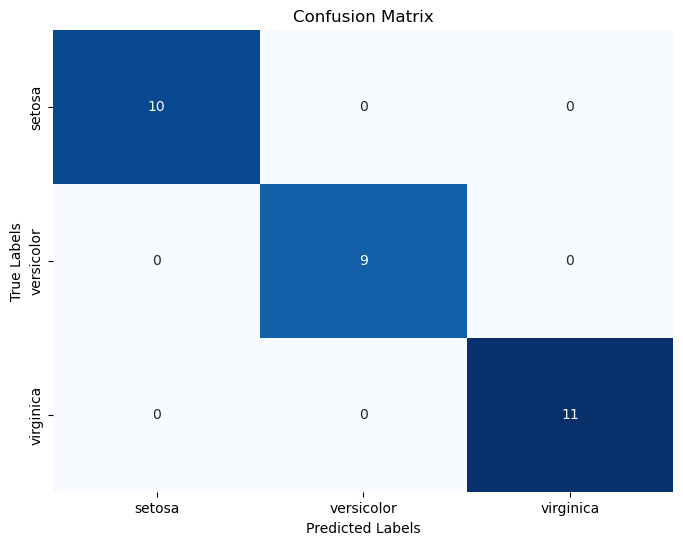


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


ROC-AUC is not applicable for multi-class classification.


In [28]:
# Step 1: Make predictions on the testing data
print("Making predictions on the testing data...")
y_pred = rf_model.predict(X_test)  # Predicted class labels
y_pred_proba = rf_model.predict_proba(X_test)  # Predicted probabilities for all classes

# Display the predicted outcomes and probabilities
print("Predicted Class Labels (y_pred):", y_pred[:10])  # Show first 10 predictions
print("Predicted Probabilities (y_pred_proba):\n", y_pred_proba[:10])  # Show first 10 probability arrays

## Building and Evaluating a Random Forest Model

This process involves loading a cleaned dataset, splitting the data into training and testing sets, initializing a Random Forest Classifier, training the model, and then making predictions on the test data.

### Steps:

1. **Load the Dataset**:
   - Load the dataset (`cleaned_file.csv`) into a pandas DataFrame.

2. **Define Features and Target**:
   - The features (`X`) are selected based on columns related to the home and away team goals and points.
   - The target variable (`y`) is the match result (`FullTimeResult`), which includes values like 'H', 'D', or 'A' (home win, draw, away win).

3. **Split Data into Training and Testing Sets**:
   - The data is split into training and testing sets with an 80/20 ratio, ensuring that the model is trained on most of the data and evaluated on a separate portion.

4. **Train the Model**:
   - The Random Forest Classifier is initialized with a random seed for reproducibility.
   - The model is trained using the training data (`X_train`, `y_train`).

5. **Make Predictions**:
   - After training, the model is used to predict class labels (`y_pred`) for the test data.
   - The predicted probabilities (`y_pred_proba`) for each class are also calculated, providing the likelihood of each outcome.

### Code Example:




In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load your dataset (replace with your actual dataset)
df_cleaned_data = pd.read_csv('cleaned_file.csv')  # Replace with your file path

# Step 2: Define the features (X) and target (y)
X = df_cleaned_data[['FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'HomeTeamPoints', 'AwayTeamPoints']]
y = df_cleaned_data['FullTimeResult']  # Target variable (match result: 'H', 'D', 'A')

# Step 3: Split the data into training and testing sets (80% train, 20% test)
print("Splitting data into training and testing sets (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the split data
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("Data split successfully.\n")

# Step 4: Initialize the Random Forest Classifier
print("Initializing RandomForestClassifier...")
rf_model = RandomForestClassifier(random_state=42)

# Step 5: Train the model using the training data (X_train, y_train)
print("Training the model with the training data...")
rf_model.fit(X_train, y_train)

# Output: Check the training progress and model performance
print("Model trained successfully.")

# Step 6: Make predictions on the testing data
print("Making predictions on the testing data...")
y_pred = rf_model.predict(X_test)  # Predicted class labels
y_pred_proba = rf_model.predict_proba(X_test)  # Predicted probabilities for all classes

# Display the predicted outcomes and probabilities
print("Predicted Class Labels (y_pred):", y_pred[:10])  # Show first 10 predictions
print("Predicted Probabilities (y_pred_proba):\n", y_pred_proba[:10])  # Show first 10 probability arrays

Splitting data into training and testing sets (80% train, 20% test)...
Training set size: 9582 samples
Testing set size: 2396 samples
Data split successfully.

Initializing RandomForestClassifier...
Training the model with the training data...
Model trained successfully.
Making predictions on the testing data...
Predicted Class Labels (y_pred): ['H' 'A' 'D' 'H' 'A' 'A' 'A' 'D' 'D' 'H']
Predicted Probabilities (y_pred_proba):
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Football Match Outcome Prediction Using Random Forest Classifier

This notebook demonstrates the process of predicting football match outcomes (Home Win, Draw, Away Win) using a **Random Forest Classifier**. The dataset used contains features such as full-time goals and team points, which are used to train and evaluate the model. Additionally, a **DummyClassifier** is used as a baseline to compare the performance of the Random Forest model.

---

## Steps Overview

1. **Loading the Dataset**: The cleaned dataset is loaded and inspected.
2. **Defining Features and Target**: Features (`X`) and target (`y`) are defined for the model.
3. **Splitting the Data**: The dataset is split into training and testing sets (80% train, 20% test) with stratification.
4. **Initializing the Random Forest Classifier**: A Random Forest model is initialized with class weighting to handle imbalanced data.
5. **Training the Model**: The model is trained on the training data.
6. **Evaluating on Training Data**: The model's performance is evaluated on the training set.
7. **Making Predictions on Testing Data**: Predictions are made on the testing set.
8. **Evaluating on Testing Data**: The model's performance is evaluated on the testing set using metrics like accuracy, precision, recall, and F1-score. A confusion matrix is also visualized.
9. **Baseline Model (DummyClassifier)**: A DummyClassifier is initialized and trained to serve as a baseline.
10. **Evaluating the Baseline Model**: The DummyClassifier's performance is evaluated on the testing set.

---

## Key Metrics

- **Accuracy**: Measures the proportion of correctly predicted outcomes.
- **Precision**: Indicates the model's ability to correctly identify positive outcomes.
- **Recall**: Measures the model's ability to find all positive outcomes.
- **F1-Score**: Harmonic mean of precision and recall, providing a balanced measure.

---

## Visualizations

- **Confusion Matrix**: A heatmap showing the true vs predicted labels for both the Random Forest and DummyClassifier models.

---

## Code Execution

In [23]:
# Import necessary libraries
import pandas as pd
import joblib  # Import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Data
df = pd.read_csv("cleaned_file.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by="Date").reset_index(drop=True)

# Feature Engineering: Head-to-Head Stats
head_to_head_wins = {}
def get_head_to_head_stats(home, away):
    return head_to_head_wins.get((home, away), 0), head_to_head_wins.get((away, home), 0)
h2h_home_wins, h2h_away_wins = [], []
for _, row in df.iterrows():
    home, away, result = row["HomeTeam"], row["AwayTeam"], row["FullTimeResult"]
    home_wins, away_wins = get_head_to_head_stats(home, away)
    h2h_home_wins.append(home_wins)
    h2h_away_wins.append(away_wins)
    if result == "H":
        head_to_head_wins[(home, away)] = home_wins + 1
    elif result == "A":
        head_to_head_wins[(away, home)] = away_wins + 1
df["H2H_HomeWins"], df["H2H_AwayWins"] = h2h_home_wins, h2h_away_wins

# Feature Engineering: Team Form (Last 5 Matches)
team_form = {}
def get_team_form(team):
    return sum(team_form.get(team, [])[-5:])
home_team_form, away_team_form = [], []
for _, row in df.iterrows():
    home, away = row["HomeTeam"], row["AwayTeam"]
    home_team_form.append(get_team_form(home))
    away_team_form.append(get_team_form(away))
    team_form.setdefault(home, []).append(row["HomeTeamPoints"])
    team_form.setdefault(away, []).append(row["AwayTeamPoints"])
df["HomeTeamForm"], df["AwayTeamForm"] = home_team_form, away_team_form

# Feature Engineering: Season Rankings
team_points = {}
def get_team_ranking(team):
    return team_points.get(team, 0)
home_team_rank, away_team_rank = [], []
for _, row in df.iterrows():
    home, away = row["HomeTeam"], row["AwayTeam"]
    home_team_rank.append(get_team_ranking(home))
    away_team_rank.append(get_team_ranking(away))
    team_points[home] = team_points.get(home, 0) + row["HomeTeamPoints"]
    team_points[away] = team_points.get(away, 0) + row["AwayTeamPoints"]
df["HomeTeamRank"], df["AwayTeamRank"] = home_team_rank, away_team_rank

# Model Training
features = ["H2H_HomeWins", "H2H_AwayWins", "HomeTeamForm", "AwayTeamForm", "HomeTeamRank", "AwayTeamRank"]
X = df[features]
y = df["FullTimeResult"].map({"H": 0, "D": 1, "A": 2})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
print("Initializing RandomForestClassifier...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Training the model with the training data...")
model.fit(X_train, y_train)
print("Model trained successfully.")

# Save the model using joblib
joblib.dump(model, "rf_model.joblib")
print("✅ Model saved as rf_model.joblib")

# Evaluate Model
preds = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, preds))

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Display the predicted outcomes and probabilities
print("Predicted Class Labels (y_pred):", y_pred[:10])
print("Predicted Probabilities (y_pred_proba):\n", y_pred_proba[:10])


Initializing RandomForestClassifier...
Training the model with the training data...
Model trained successfully.
✅ Model saved as rf_model.joblib
Model Accuracy: 0.4732888146911519
Predicted Class Labels (y_pred): [0 2 0 0 2 0 0 0 0 2]
Predicted Probabilities (y_pred_proba):
 [[0.51 0.23 0.26]
 [0.33 0.06 0.61]
 [0.64 0.2  0.16]
 [0.51 0.24 0.25]
 [0.29 0.13 0.58]
 [0.47 0.17 0.36]
 [0.41 0.31 0.28]
 [0.65 0.17 0.18]
 [0.59 0.1  0.31]
 [0.4  0.14 0.46]]


# 👋 the Deployment api logic and all related stufs are in the app.py !




